# Activité Avancée : Analyse Statistique Descriptive avec Python

**Étapes de l’Activité**
1. Exploration Initiale des Données


In [94]:
import numpy as np
import matplotlib as plt
import pandas as pd

df = pd.read_csv("data.csv",sep=",", header=0)
df.head(10)




,Age,Revenu,Score,Genre,Ville
0,46.0,78.0,92.0,Homme,Lyon
1,38.0,65.0,80.0,Homme,Marseille
2,48.0,46.0,100.0,Homme,Bordeaux
3,58.0,35.0,47.0,Homme,Paris
4,NaN,59.0,91.0,Femme,Marseille
5,37.0,52.0,88.0,Femme,Marseille
6,59.0,64.0,58.0,Homme,Paris
7,49.0,58.0,89.0,Femme,Marseille
8,34.0,68.0,75.0,Femme,Paris
9,47.0,36.0,68.0,Homme,Lyon


In [95]:
df.dtypes

Age       float64
Revenu    float64
Score     float64
Genre      object
Ville      object
dtype: object

Pourcentage de Valeurs manquantes par rapport au nombre de ligne

In [96]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False) * 100

Revenu    3.3
Age       1.9
Score     0.8
Genre     0.0
Ville     0.0
dtype: float64

In [97]:
df.dtypes

Age       float64
Revenu    float64
Score     float64
Genre      object
Ville      object
dtype: object

Gestion des valeurs manquantes

In [98]:
df = df.fillna({
    "Score" : df["Score"].mean(),
    "Age" : df["Age"].mean(),
    "Revenu" : df["Revenu"].median()
})


In [99]:
df.dtypes

Age       float64
Revenu    float64
Score     float64
Genre      object
Ville      object
dtype: object

In [100]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False) * 100

Age       0.0
Revenu    0.0
Score     0.0
Genre     0.0
Ville     0.0
dtype: float64

In [101]:
df.head(20)

,Age,Revenu,Score,Genre,Ville
0,46.000000,78.0,92.0,Homme,Lyon
1,38.000000,65.0,80.0,Homme,Marseille
2,48.000000,46.0,100.0,Homme,Bordeaux
3,58.000000,35.0,47.0,Homme,Paris
4,40.395515,59.0,91.0,Femme,Marseille
5,37.000000,52.0,88.0,Femme,Marseille
6,59.000000,64.0,58.0,Homme,Paris
7,49.000000,58.0,89.0,Femme,Marseille
8,34.000000,68.0,75.0,Femme,Paris
9,47.000000,36.0,68.0,Homme,Lyon


In [79]:
df.dtypes

Age        object
Revenu    float64
Score      object
Genre      object
Ville      object
dtype: object

### 2. Analyse de la Distribution

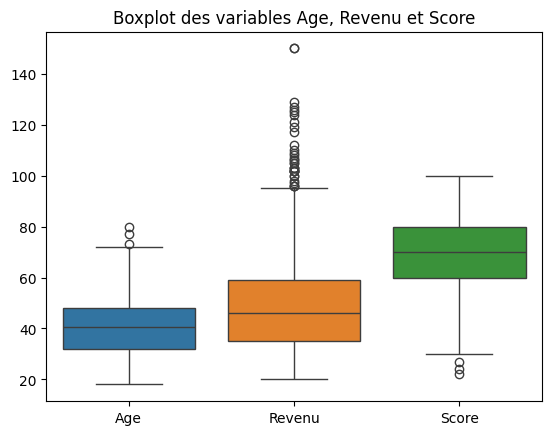

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data = df[["Age", "Revenu", "Score"]])
plt.title("Boxplot des variables Age, Revenu et Score")
plt.show()

*Interpretation des valeurs aberrantes (outlier)*

Y'a trop de valeurs aberrantes 

### 3. Analyse Catégorique
Calculer la répartition des participants selon leur Genre et leur Ville

In [147]:
# Calcul de la répartition selon le Genre et la Ville
repartition = df.groupby(["Genre", "Ville"]).size().reset_index(name="Effectif")

# Ajout des proportions
repartition["Proportion (%)"] = (repartition["Effectif"] / df.shape[0]) * 100

# Affichage du résultat
print("Répartition des participants selon Genre et Ville :")
repartition.head(10)


Répartition des participants selon Genre et Ville :


,Genre,Ville,Effectif,Proportion (%)
0,Femme,Bordeaux,71,7.1
1,Femme,Lille,65,6.5
2,Femme,Lyon,120,12.0
3,Femme,Marseille,104,10.4
4,Femme,Paris,157,15.7
5,Homme,Bordeaux,66,6.6
6,Homme,Lille,58,5.8
7,Homme,Lyon,88,8.8
8,Homme,Marseille,119,11.9
9,Homme,Paris,152,15.2


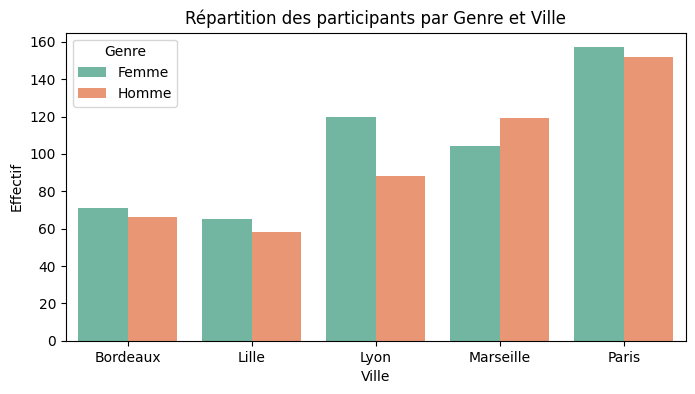

In [174]:
# Visualisation : Diagramme en barres pour les effectifs
plt.figure(figsize=(8, 4))
sns.barplot(data=repartition, x="Ville", y="Effectif", hue="Genre", palette="Set2")
plt.title("Répartition des participants par Genre et Ville")
plt.xlabel("Ville")
plt.ylabel("Effectif")
plt.show()

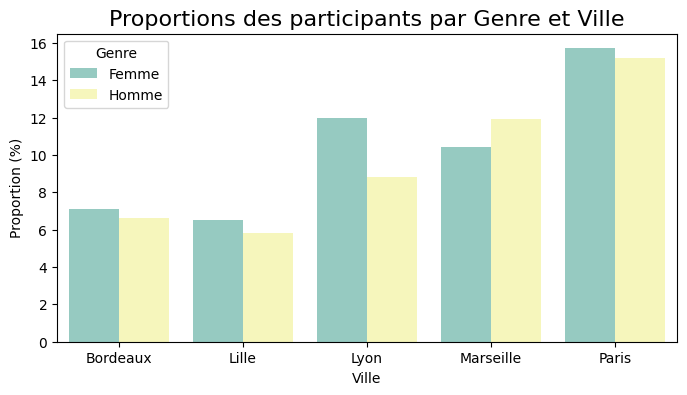

In [175]:
# Visualisation : Diagramme en barres pour les proportions
repartition["Proportion (%)"] = (repartition["Effectif"] / df.shape[0]) * 100

plt.figure(figsize=(8, 4))
sns.barplot(data=repartition, x="Ville", y="Proportion (%)", hue="Genre", palette="Set3")
plt.title("Proportions des participants par Genre et Ville", fontsize=16)
plt.xlabel("Ville")
plt.ylabel("Proportion (%)")
plt.show()

In [164]:
# Colonnes ciblées
colonnes = ["Age", "Revenu", "Score"]

# Calcul de la variance et de l'écart-type
for col in colonnes:
    variance = df[col].var()  # Variance
    ecart_type = df[col].std()  # Écart-type
    print(f"{col} :")
    print(f" - Variance : {variance}")
    print(f" - Écart-type : {ecart_type}")
    print()


Age :
 - Variance : 130.60514541044614
 - Écart-type : 11.428260821771882

Revenu :
 - Variance : 400.24321821821826
 - Écart-type : 20.006079531437894

Score :
 - Variance : 218.1155954341438
 - Écart-type : 14.768737096791446



In [169]:
# Calcul des quartiles et de l'IQR
for col in colonnes:
    q1 = df[col].quantile(0.25)  # Premier quartile (25%)
    q2 = df[col].median()  # Médiane (50%)
    q3 = df[col].quantile(0.75)  # Troisième quartile (75%)
    iqr = q3 - q1  # Intervalle interquartile (IQR)
    
    print(f"{col} :")
    print(f" - Q1 (25%) : {q1}")
    print(f" - Q2 (50%, médiane) : {q2}")
    print(f" - Q3 (75%) : {q3}")
    print(f" - IQR : {iqr}")
    print()

Age :
 - Q1 (25%) : 32.0
 - Q2 (50%, médiane) : 40.39551478083588
 - Q3 (75%) : 48.0
 - IQR : 16.0

Revenu :
 - Q1 (25%) : 35.0
 - Q2 (50%, médiane) : 46.0
 - Q3 (75%) : 59.0
 - IQR : 24.0

Score :
 - Q1 (25%) : 60.0
 - Q2 (50%, médiane) : 70.0
 - Q3 (75%) : 80.0
 - IQR : 20.0

